# Introduction to Artificial Intelligence (ARTIFIN)

# Lecture 05: Supervised Learning

---


In [2]:
from IPython.display import Image
%matplotlib inline

ModuleNotFoundError: No module named 'matplotlib'

# 1. Import Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.colors import ListedColormap
from sklearn import datasets
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import export_graphviz
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# 2. Load Dataset

In [ ]:
# load the iris dataset
iris = ...
...

In [ ]:
# load the features into variable X, and select petal_length and petal_width
...

In [ ]:
# load the labels into variable y
...
print('Class labels:', np.unique(y))

Class labels: [0 1 2]


In [ ]:
# explore your dataset visually

# 3. Prepare Dataset

In [ ]:
# Generate a train a test dataset by using your input data (70% training, 30% testing)
X_train, X_test, y_train, y_test = ...

In [ ]:
print('Labels count in y:', np.bincount(y))
print('Labels count in y_train:', np.bincount(y_train))
print('Labels count in y_test:', np.bincount(y_test))

Labels count in y: [50 50 50]
Labels count in y_train: [35 35 35]
Labels count in y_test: [15 15 15]


Standardizing the features:

In [ ]:
# Normalise your training and test datasets, considering mean-std normalisation, Hint: have a look at sklearn's StandardScaler()
...

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
# Create a variable X_train_std containing the normalised training features
X_train_std = ...

In [ ]:
# Create a variable X_test_std containing the normalised test features
X_test_std = ...

In [ ]:
# To check recent matplotlib compatibility
import matplotlib
from distutils.version import LooseVersion


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    color=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]

        
        if LooseVersion(matplotlib.__version__) < LooseVersion('0.3.4'):
            plt.scatter(X_test[:, 0],
                        X_test[:, 1],
                        c='',
                        edgecolor='black',
                        alpha=1.0,
                        linewidth=1,
                        marker='o',
                        s=100, 
                        label='test set')
        else:
            plt.scatter(X_test[:, 0],
                        X_test[:, 1],
                        c='none',
                        edgecolor='black',
                        alpha=1.0,
                        linewidth=1,
                        marker='o',
                        s=100, 
                        label='test set')        

# Decision tree

In [ ]:
# create a decision tree. Hint, have a look at: sklearn, DecisionTreeClassifier
tree_model = ...
...

In [ ]:
# train your decision tree on the train dataset
tree_model...
...

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [ ]:
# obtain the model's predictions on the test dataset
y_pred = ...
...

In [ ]:
print('Accuracy: %.2f' % accuracy_score(y_test,y_pred))

Accuracy: 0.98


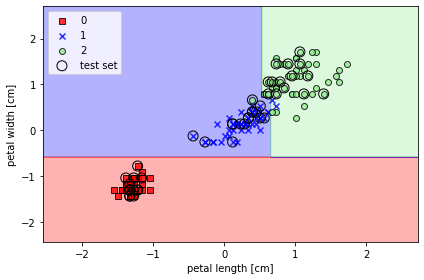

In [ ]:
X_combined = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined, y_combined, 
                      classifier=tree_model,
                      test_idx=range(105, 150))

plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.savefig('dt_hyperplanes.png', dpi=300)
plt.show()

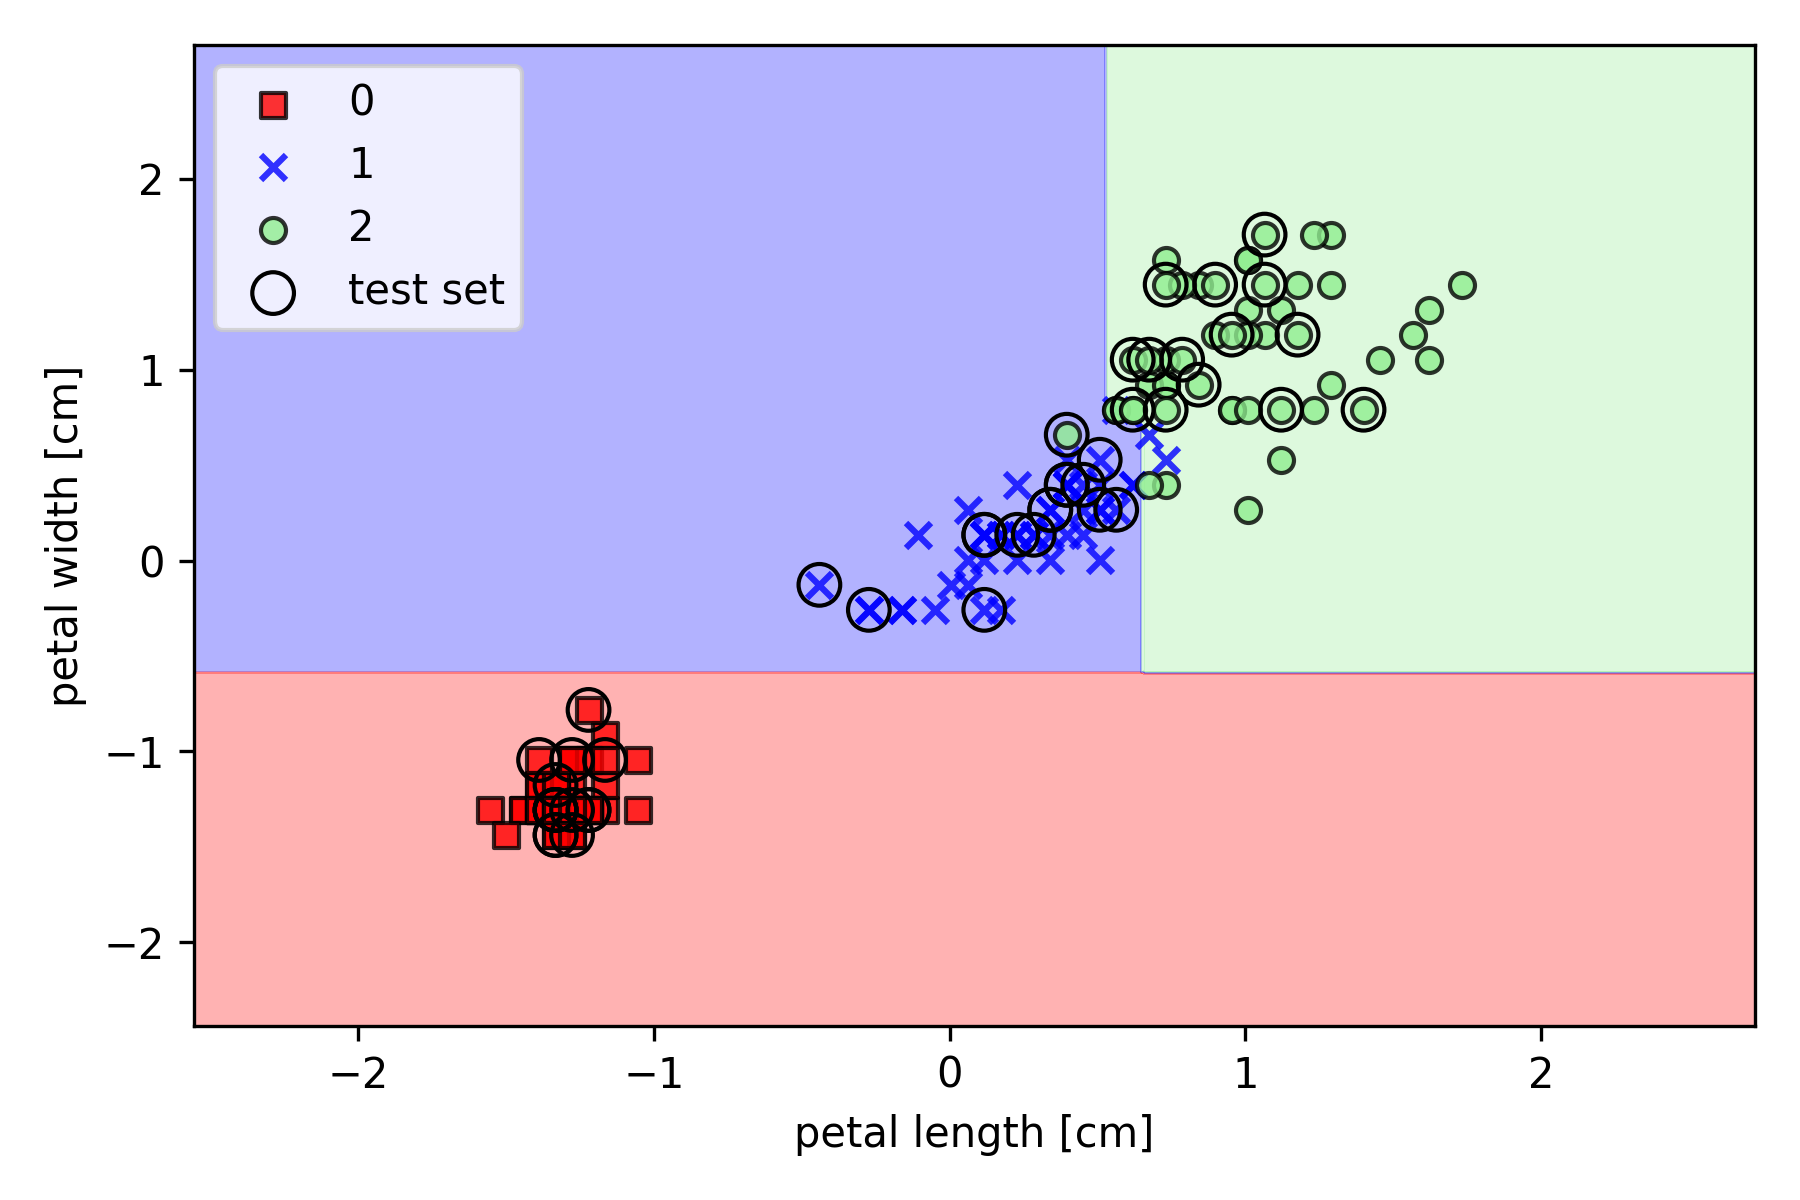

In [ ]:
Image(filename='dt_hyperplanes.png', width=600) 

Text(91.68, 0.5, 'predicted label')

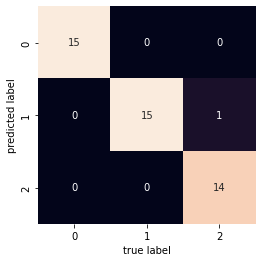

In [ ]:
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

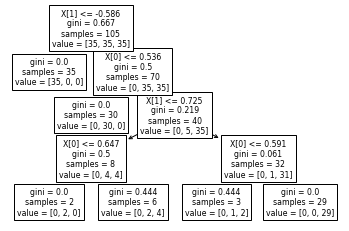

In [ ]:
from sklearn import tree

tree.plot_tree(tree_model)
plt.savefig('dt_nodes_1.png')
plt.show()

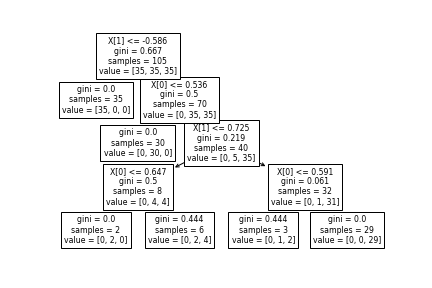

In [ ]:
Image(filename='dt_nodes_1.png', width=600) 

In [ ]:
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz

dot_data = export_graphviz(tree_model,
                           filled=True, 
                           rounded=True,
                           class_names=['Setosa', 
                                        'Versicolor',
                                        'Virginica'],
                           feature_names=['petal length', 
                                          'petal width'],
                           out_file=None) 
graph = graph_from_dot_data(dot_data) 
graph.write_png('dt_nodes_2.png') 

True

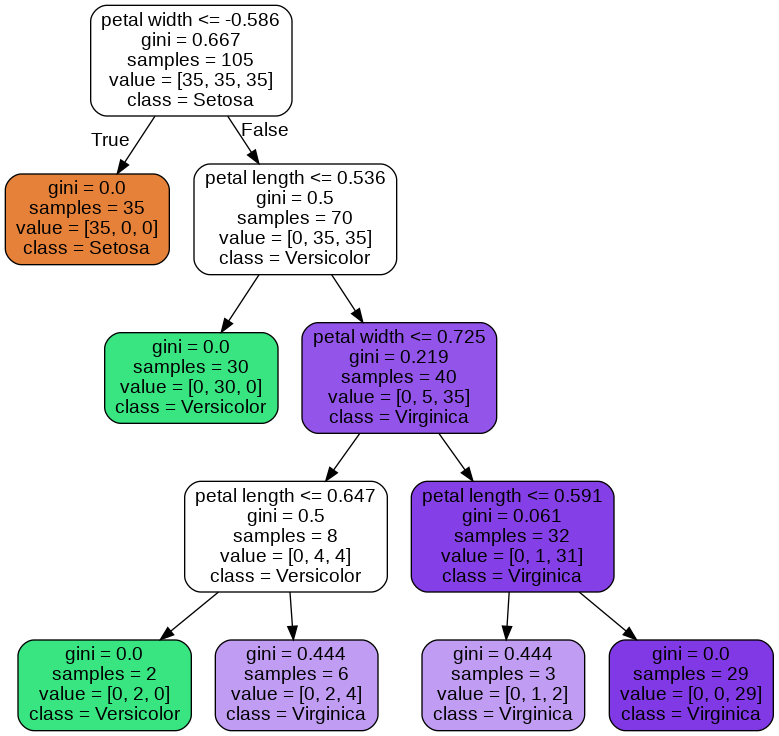

In [ ]:
Image(filename='dt_nodes_2.png', width=600) 

# Random Forests

In [ ]:
# create a random forest. Hint use, sklearn RandomForestClassifier
forest = ...

In [ ]:
# train your random forest using your training dataset
forest...
...

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=2,
                       oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [ ]:
# obtain the model's predictions
y_pred = ...
...

In [ ]:
print('Accuracy: %.2f' % accuracy_score(y_test,y_pred))

Accuracy: 0.98


Text(91.68, 0.5, 'predicted label')

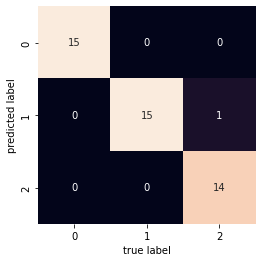

In [ ]:
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

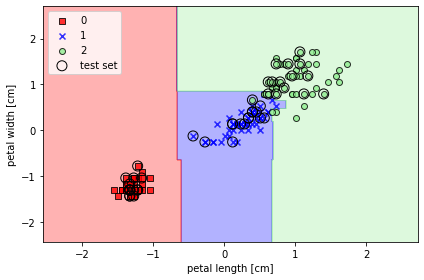

In [ ]:
plot_decision_regions(X_combined, y_combined, 
                      classifier=forest, test_idx=range(105, 150))

plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.savefig('rf_hyperplanes.png', dpi=300)
plt.show()

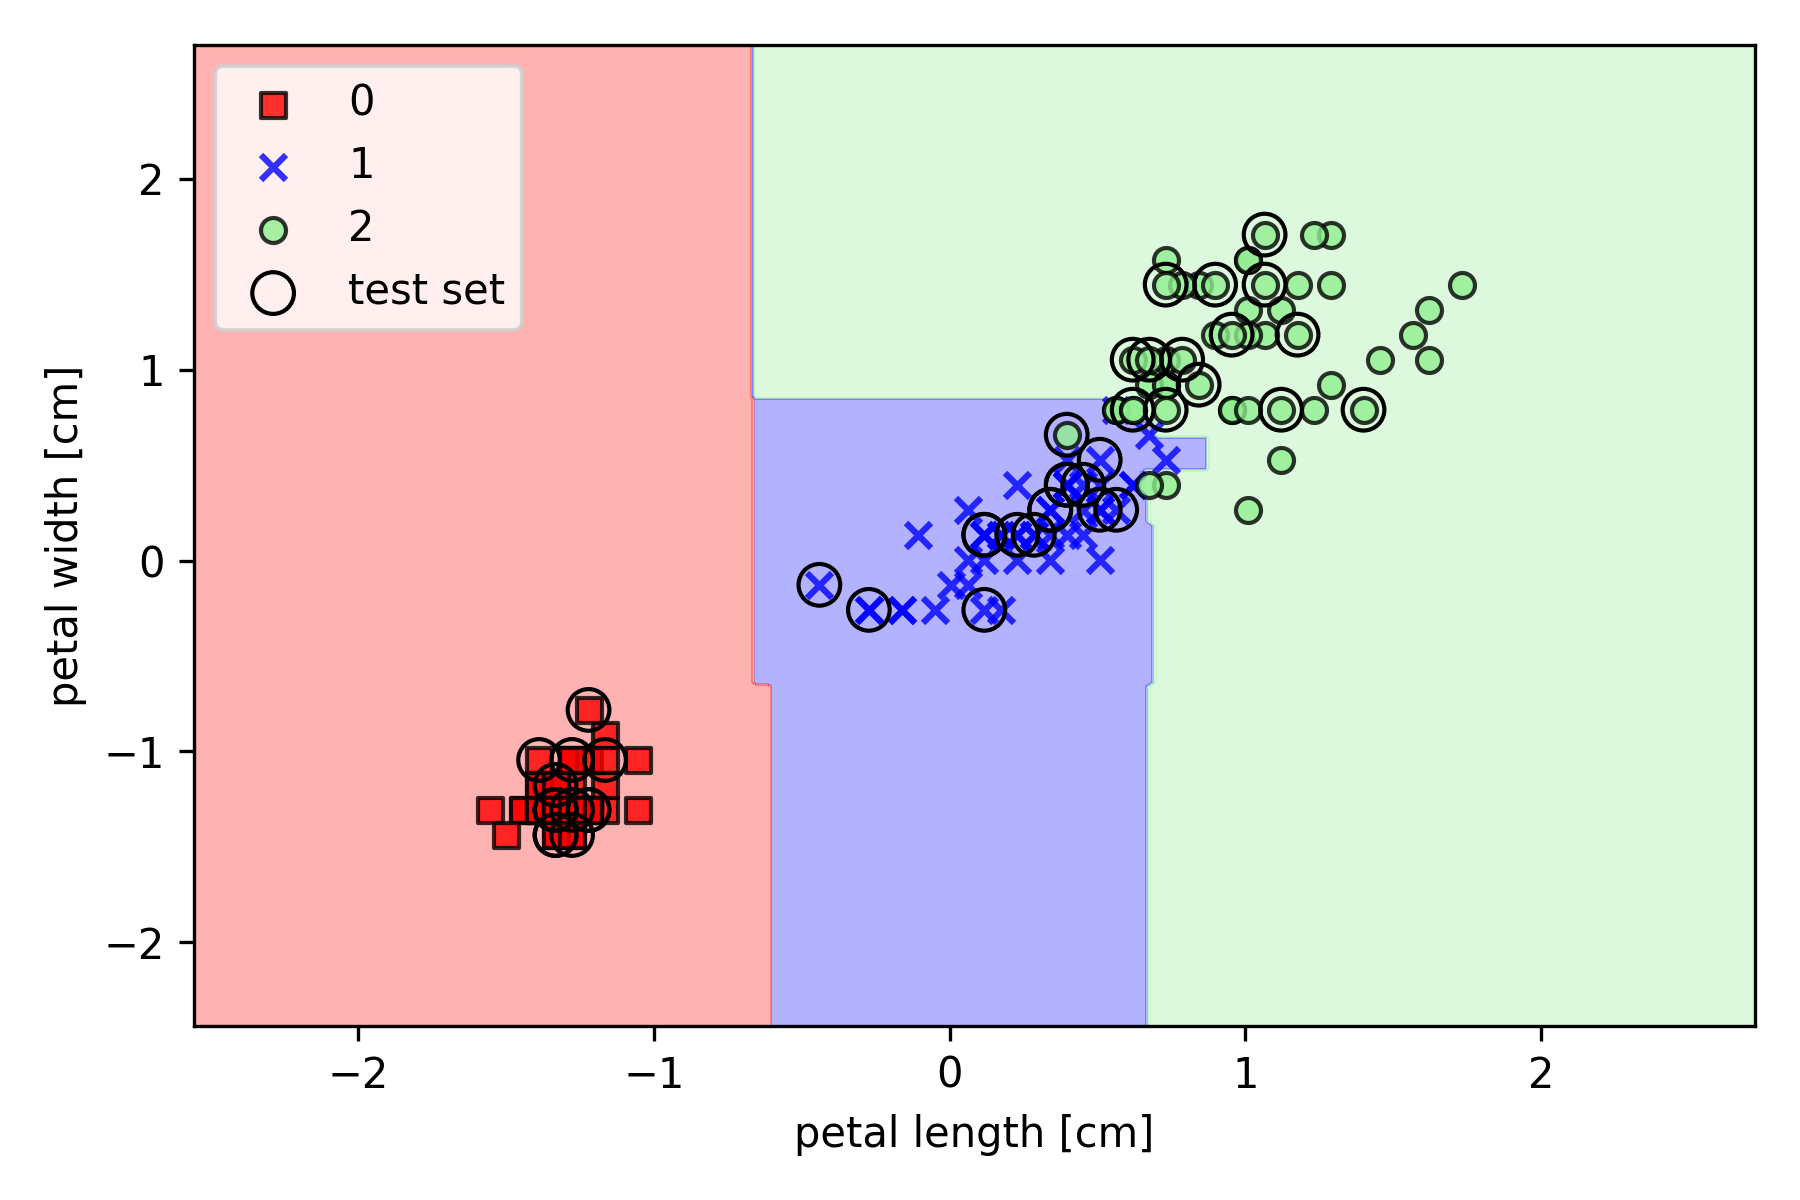

In [ ]:
Image(filename='rf_hyperplanes.png', width=600) 

<br>
<br>